In [9]:
import numpy as np
import pandas as pd

### 一、合并
- 合并数据集可以通过pandas中的内置的方法进行（如：pandas.merge,pandas.concat,combine_first）

#### 1.merge/concat方法
- 数据合并merge、concat参数总结
- merge:如合并同一个病人的不同属性数据
- concat：如合并多个病人的数据
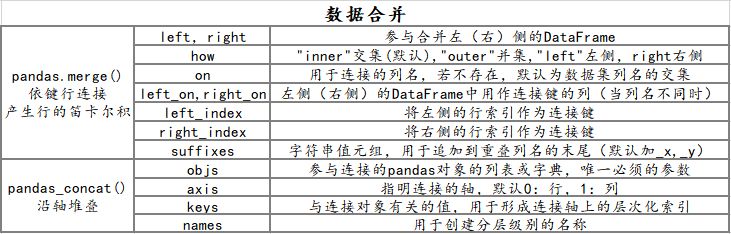

In [10]:
# pandas.merge()方法：依键行连接
d1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1':range(7)})
d2 = pd.DataFrame({'key':['a','b','b','d'],'data1':range(4)})
print (d1)
print (d2)

print(pd.merge(d1,d2,on = 'key',how = 'right'))

# 笛卡尔积：由于d1三个b，d2连个b，所以合并后产生六个b

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data1
0   a      0
1   b      1
2   b      2
3   d      3
  key  data1_x  data1_y
0   b      0.0        1
1   b      1.0        1
2   b      6.0        1
3   b      0.0        2
4   b      1.0        2
5   b      6.0        2
6   a      2.0        0
7   a      4.0        0
8   a      5.0        0
9   d      NaN        3


In [11]:
# pandas.concat()方法：沿轴并接
# 用此方法合并时，会根据列名进行排序合并并取并集，数据不存在时填充空值
a = pd.DataFrame(np.arange(12).reshape(3,4))
print(a)

c = pd.concat([a,a],axis =0)
print(c)

b = pd.DataFrame(np.array(c))
print(b)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
3  0  1   2   3
4  4  5   6   7
5  8  9  10  11


In [12]:
#a = pd.read_csv(r"C:\Users\Administrator\Desktop\test\titanic train.csv")
#b = pd.read_csv(r"C:\Users\Administrator\Desktop\test\titanic test.csv")
#c = pd.concat([a,b],axis = 1)
#c

#### 2、合并重叠数据
    - np.where(条件，填充数据，原数据)         条件合并
    - a.combinr_first(b) 打补丁

### 二、重塑
- 有许多用于重新排列表格型数据的基础运算，如reshape，pivot等

#### 1、重塑层次化索引
- stack  列旋转为行  默认滤过缺失值
- unstack行旋转为列

In [13]:
a = b.stack()
print(a)
print(a.unstack())

0  0     0
   1     1
   2     2
   3     3
1  0     4
   1     5
   2     6
   3     7
2  0     8
   1     9
   2    10
   3    11
3  0     0
   1     1
   2     2
   3     3
4  0     4
   1     5
   2     6
   3     7
5  0     8
   1     9
   2    10
   3    11
dtype: int32
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
3  0  1   2   3
4  4  5   6   7
5  8  9  10  11


#### 2、长格式转化为宽格式
- a.pivot(参数1，参数2，数据列名)
- pivot = set_index + unstack

### 三、转换

#### 1、删除重复数据
- duplicated方法返回一个布尔型Series，表示各行是否重复
- drop_duplicates方法，返回一个移除了重复行的DatatFrame
- **这两个方法针对DataFrame,默认保留第一个出现的值,传入take_last = True则保留最后一个**
- **这两个方法会判断全部列，也可以指定部分列**

In [16]:
d1 = pd.DataFrame({"k1":["one"]*3+["two"]*4,"k2":[1,1,2,3,3,4,4],"k3":[13,13,24,32,31,40,40]})
print(d1)
print(d1.duplicated())#判断重复数据
print(d1.drop_duplicates())#丢弃重复数据
print(d1.drop_duplicates("k1"))#指定列

    k1  k2  k3
0  one   1  13
1  one   1  13
2  one   2  24
3  two   3  32
4  two   3  31
5  two   4  40
6  two   4  40
0    False
1     True
2    False
3    False
4    False
5    False
6     True
dtype: bool
    k1  k2  k3
0  one   1  13
2  one   2  24
3  two   3  32
4  two   3  31
5  two   4  40
    k1  k2  k3
0  one   1  13
3  two   3  32


#### 2、添加列
- 直接添加：a["列名"] = 数据
- 映射添加：a["列名"] = map(字典)

In [22]:
# 直接添加
d1 = pd.DataFrame({"k1":["one"]*3+["two"]*4,"k2":[1,1,2,3,3,4,4],"k3":[13,13,24,32,31,40,40]})
d1["a"] = np.arange(7)
print(d1)
#映射添加
x = {"one":2,"two":4}
d1["b"] = d1["k1"].map(x)
print(d1)

    k1  k2  k3  a
0  one   1  13  0
1  one   1  13  1
2  one   2  24  2
3  two   3  32  3
4  two   3  31  4
5  two   4  40  5
6  two   4  40  6
    k1  k2  k3  a  b
0  one   1  13  0  2
1  one   1  13  1  2
2  one   2  24  2  2
3  two   3  32  3  4
4  two   3  31  4  4
5  two   4  40  5  4
6  two   4  40  6  4


#### 3、替换值
- a.replace([被替换值]，[替换值])
- a.replace(字典)
- **替换时，不限制行和列,指定列时，产生新的Series**

In [35]:
d1 = pd.DataFrame({"k1":["one"]*3+["two"]*4,"k2":[1,1,2,3,3,4,4],"k3":[13,13,24,32,31,40,40]})
print(d1)
d2= d1.replace(["one","two"],[1,2])
print(d2)
print(d2['k1'].replace(1,2))
print(d2)

    k1  k2  k3
0  one   1  13
1  one   1  13
2  one   2  24
3  two   3  32
4  two   3  31
5  two   4  40
6  two   4  40
   k1  k2  k3
0   1   1  13
1   1   1  13
2   1   2  24
3   2   3  32
4   2   3  31
5   2   4  40
6   2   4  40
0    2
1    2
2    2
3    2
4    2
5    2
6    2
Name: k1, dtype: int64
   k1  k2  k3
0   1   1  13
1   1   1  13
2   1   2  24
3   2   3  32
4   2   3  31
5   2   4  40
6   2   4  40


#### 4、轴索引重命名
- map方法(原地修改):a.index.map(new_index)
- rename方法（创建副本,如果想就地修改，传入replace = True）：a.rename(index = 字典)

In [67]:
x = pd.read_csv(r"C:\Users\Administrator\Desktop\111.csv",names = list("abcd"))
print(x)
y = x.replace(np.nan,45)
print(y)
print(y.rename(index = {"0":"a","1":"b","2":"c","3":"d","4":"e"},inplace=False))

      a     b     c     d
0  33.0  23.0  66.0  34.0
1  56.0  23.0  23.0   NaN
2  89.0  87.0   NaN  22.0
3   NaN   NaN   NaN   NaN
4  12.0   NaN   NaN   NaN
      a     b     c     d
0  33.0  23.0  66.0  34.0
1  56.0  23.0  23.0  45.0
2  89.0  87.0  45.0  22.0
3  45.0  45.0  45.0  45.0
4  12.0  45.0  45.0  45.0
      a     b     c     d
0  33.0  23.0  66.0  34.0
1  56.0  23.0  23.0  45.0
2  89.0  87.0  45.0  22.0
3  45.0  45.0  45.0  45.0
4  12.0  45.0  45.0  45.0


#### 5、离散化和面元划分
- pd.cut()
- pd.qcut()
**见后面数据分组与聚合**

#### 6、检测和过滤异常值

In [82]:
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(1000,4))
print(data)
print(data.describe())
d1 = data[3]
print(d1[np.abs(d1)>3])#列名为3的绝对值大于3的索引及值
data[np.abs(data)>3] = np.sign(data)*3#限制数据区域进行操作
print(data.describe())

            0         1         2         3
0   -0.204708  0.478943 -0.519439 -0.555730
1    1.965781  1.393406  0.092908  0.281746
2    0.769023  1.246435  1.007189 -1.296221
3    0.274992  0.228913  1.352917  0.886429
4   -2.001637 -0.371843  1.669025 -0.438570
5   -0.539741  0.476985  3.248944 -1.021228
6   -0.577087  0.124121  0.302614  0.523772
7    0.000940  1.343810 -0.713544 -0.831154
8   -2.370232 -1.860761 -0.860757  0.560145
9   -1.265934  0.119827 -1.063512  0.332883
10  -2.359419 -0.199543 -1.541996 -0.970736
11  -1.307030  0.286350  0.377984 -0.753887
12   0.331286  1.349742  0.069877  0.246674
13  -0.011862  1.004812  1.327195 -0.919262
14  -1.549106  0.022185  0.758363 -0.660524
15   0.862580 -0.010032  0.050009  0.670216
16   0.852965 -0.955869 -0.023493 -2.304234
17  -0.652469 -1.218302 -1.332610  1.074623
18   0.723642  0.690002  1.001543 -0.503087
19  -0.622274 -0.921169 -0.726213  0.222896
20   0.051316 -1.157719  0.816707  0.433610
21   1.010737  1.824875 -0.99751

#### 7、计算指标、哑变量
- 